## Image Classification on Cats & Dogs Dataset

## Importing Packages

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet152
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

## Setting Up Directories and Data


In [ ]:
!mkdir '/content/drive/MyDrive/ExtractedData/Test'
!mkdir '/content/drive/MyDrive/ExtractedData/Train'
!mkdir '/content/drive/MyDrive/ExtractedData/Valdiation'

dest_test = '/content/drive/MyDrive/ExtractedData/Test'
dest_train = '/content/drive/MyDrive/ExtractedData/Train'
dest_val = '/content/drive/MyDrive/ExtractedData/Validation'

In [ ]:
!unzip /content/drive/MyDrive/CatsDogs/task1-test.zip -d /content/drive/MyDrive/CatsDogs

In [ ]:
!unzip /content/drive/MyDrive/CatsDogs/task1-train.zip -d /content/drive/MyDrive/CatsDogs

In [ ]:
!unzip /content/drive/MyDrive/CatsDogs/task1-validation.zip -d /content/drive/MyDrive/CatsDogs

In [ ]:
os.listdir('/content/drive/MyDrive/ExtractedData/train')

In [ ]:
import os
import shutil

# Define paths
base_dir = '/content/drive/MyDrive/'  # Change this to your base directory
source_dirs = ['CatsDogs/train', 'CatsDogs/task1-validation', 'CatsDogs/test']
target_dirs = ['ExtractedData/Train',
               'ExtractedData/Valdiation',
               'ExtractedData/Test']

# Create target directories if they don't exist
for target_dir in target_dirs:
    os.makedirs(os.path.join(base_dir, target_dir, 'cat'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, target_dir, 'dog'), exist_ok=True)

# Organize images
for source_dir, target_dir in zip(source_dirs, target_dirs):
    for image_file in os.listdir(os.path.join(base_dir, source_dir)):
        if image_file.startswith('cat.'):
            category = 'cat'
        elif image_file.startswith('dog.'):
            category = 'dog'
        else:
            continue

        source_path = os.path.join(base_dir, source_dir, image_file)
        target_path = os.path.join(base_dir, target_dir, category, image_file)

        shutil.copyfile(source_path, target_path)

print("Images organized successfully!")

Images organized successfully!


## Data Augmentation

In [ ]:
X = Y = 150
BATCH_SIZE = 128
seed = tf.random.set_seed(42)

def make_train_test_data(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='binary',
                                                      target_size=(X, Y), seed=seed)


  validation_datagen = ImageDataGenerator(rescale=1/255.0)

  validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=BATCH_SIZE,
                                                                class_mode='binary',
                                                                target_size=(X, Y),
                                                                seed=seed)
  return train_generator, validation_generator

In [ ]:
# making train and test datasets
TRAINING_DIR = '/content/drive/MyDrive/ExtractedData/Train/'
TESTING_DIR = '/content/drive/MyDrive/ExtractedData/Test/'

train_data, validation_data = make_train_test_data(TRAINING_DIR, TESTING_DIR)

Found 5760 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Using a Convolutional Neural Network (CNN)

In [ ]:
def create_cnn_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  return model

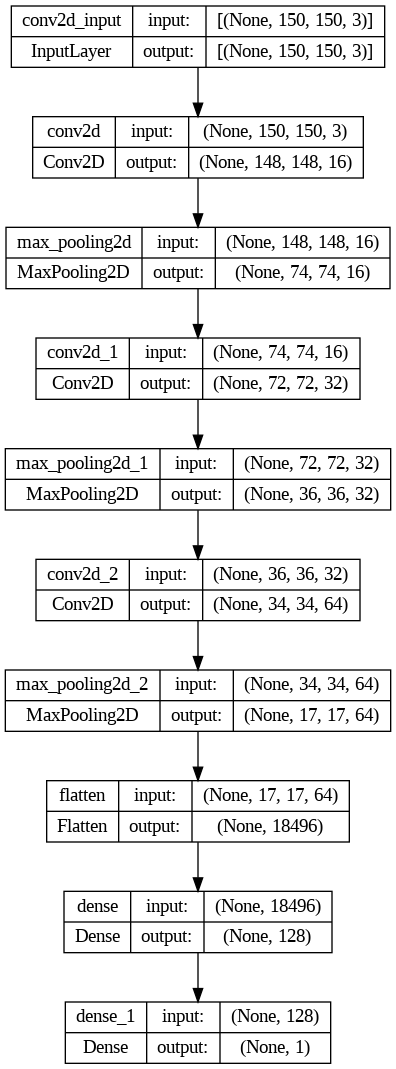

In [ ]:
# call the model function
model = create_cnn_model()
plot_model(model, "model_1.png", show_layer_names=True, show_shapes=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

EPOCHS = 15

# Train the model
history_1 = model.fit(train_data,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=validation_data)

Epoch 1/15
45/45 [==============================] - 1467s 32s/step - loss: 0.6969 - accuracy: 0.5288 - val_loss: 0.6690 - val_accuracy: 0.6050
Epoch 2/15
45/45 [==============================] - 48s 1s/step - loss: 0.6461 - accuracy: 0.6283 - val_loss: 0.6026 - val_accuracy: 0.6720
Epoch 3/15
45/45 [==============================] - 48s 1s/step - loss: 0.6349 - accuracy: 0.6413 - val_loss: 0.5791 - val_accuracy: 0.6880
Epoch 4/15
45/45 [==============================] - 48s 1s/step - loss: 0.6161 - accuracy: 0.6580 - val_loss: 0.6212 - val_accuracy: 0.6480
Epoch 5/15
45/45 [==============================] - 50s 1s/step - loss: 0.5929 - accuracy: 0.6783 - val_loss: 0.5355 - val_accuracy: 0.7350
Epoch 6/15
45/45 [==============================] - 48s 1s/step - loss: 0.5728 - accuracy: 0.6953 - val_loss: 0.5128 - val_accuracy: 0.7440
Epoch 7/15
45/45 [==============================] - 48s 1s/step - loss: 0.5617 - accuracy: 0.7108 - val_loss: 0.5166 - val_accuracy: 0.7590
Epoch 8/15
45/45 

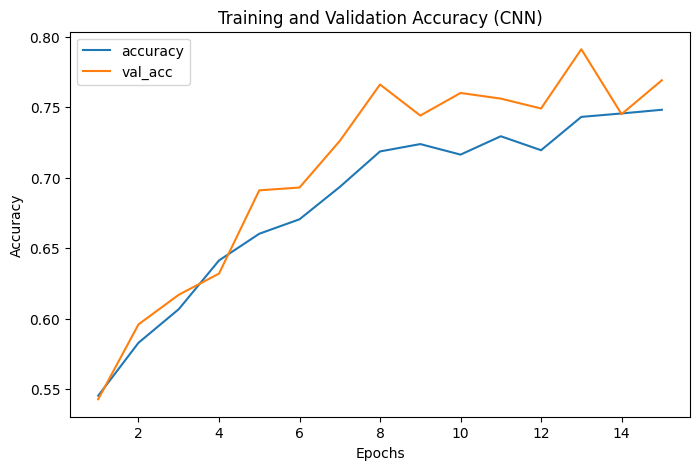

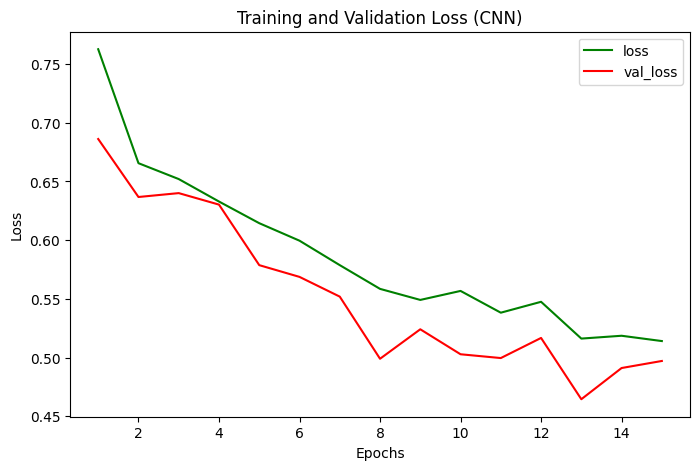

In [ ]:
history = history_1

epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# accuracy/epoch plot
plt.figure(figsize=(8, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# loss/epoch plot
plt.figure(figsize=(8, 5))
plt.title('Training and Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

## Using CNN 2

In [ ]:
def create_model_cnn_2():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  return model

In [ ]:
# call the model function 2
model_2 = create_model_cnn_2()

import warnings
warnings.filterwarnings('ignore')

EPOCHS = 15

# Train the model
history_2 = model_2.fit(train_data,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=validation_data)

Epoch 1/15
45/45 [==============================] - 76s 1s/step - loss: 0.7902 - accuracy: 0.5094 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/15
45/45 [==============================] - 59s 1s/step - loss: 0.6902 - accuracy: 0.5396 - val_loss: 0.6730 - val_accuracy: 0.5890
Epoch 3/15
45/45 [==============================] - 59s 1s/step - loss: 0.6869 - accuracy: 0.5491 - val_loss: 0.6867 - val_accuracy: 0.5010
Epoch 4/15
45/45 [==============================] - 57s 1s/step - loss: 0.6875 - accuracy: 0.5474 - val_loss: 0.6792 - val_accuracy: 0.5880
Epoch 5/15
45/45 [==============================] - 56s 1s/step - loss: 0.6782 - accuracy: 0.5668 - val_loss: 0.6731 - val_accuracy: 0.6080
Epoch 6/15
45/45 [==============================] - 59s 1s/step - loss: 0.6747 - accuracy: 0.5804 - val_loss: 0.6508 - val_accuracy: 0.6060
Epoch 7/15
45/45 [==============================] - 56s 1s/step - loss: 0.6527 - accuracy: 0.6182 - val_loss: 0.6315 - val_accuracy: 0.6290
Epoch 8/15
45/45 [==

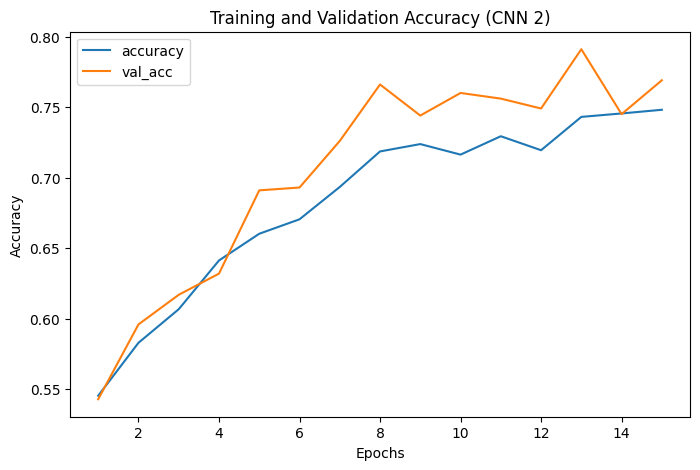

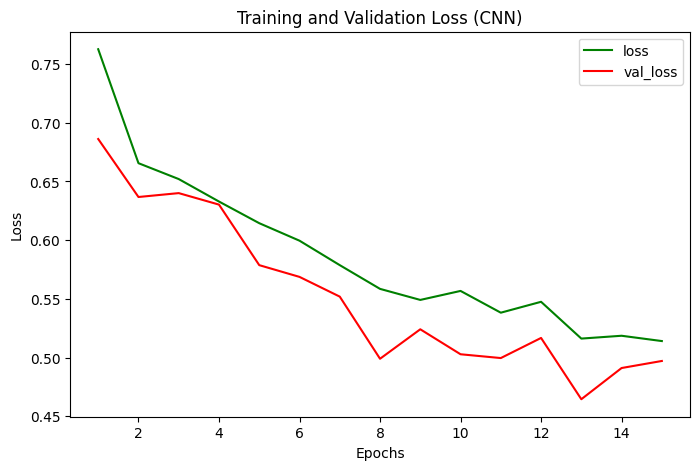

In [ ]:
history_2 = history_2.history

epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# accuracy/epoch plot
plt.figure(figsize=(8, 5))
plt.title('Training and Validation Accuracy (CNN 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# loss/epoch plot
plt.figure(figsize=(8, 5))
plt.title('Training and Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
predictions = model.predict(validation_data)

# Convert probabilities to class labels
predicted_labels = (predictions >= 0.5).astype(int)

# Print classification report
report = classification_report(validation_data.classes, predicted_labels, target_names=['cat', 'dog'])
print(report)

8/8 [==============================] - 3s 411ms/step
              precision    recall  f1-score   support

         cat       0.47      0.39      0.42       500
         dog       0.48      0.56      0.52       500

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000

